In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import pingouin as pg
from scipy.stats import chisquare
import plotly.express as px

In [17]:
df = pd.read_csv("dados/data.csv")
df.shape

(1388, 5)

In [18]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [19]:
df.dtypes
df.describe(include = 'all')

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [20]:
fig = px.scatter(data_frame=df, x="Study Hours", y="Grades", color="Sleep Hours")
fig.show()

In [21]:
df_mean_study_hours = (df["Study Hours"]).mean()
df_mean_sleep_hours = (df["Sleep Hours"]).mean()

print(df_mean_sleep_hours)
print(df_mean_study_hours)

corr_study_target = df[['Study Hours', 'Grades']].corr()
corr_sleep_target = df[['Sleep Hours', 'Grades']].corr()

print("Study and Target correlations:", corr_study_target)
print("Sleep hours and Target correlation:", corr_sleep_target)


df['Approve'] = df['Grades'] >= 50.0

8.047262247838617
4.560806916426513
Study and Target correlations:              Study Hours    Grades
Study Hours     1.000000  0.810807
Grades          0.810807  1.000000
Sleep hours and Target correlation:              Sleep Hours    Grades
Sleep Hours     1.000000 -0.124689
Grades         -0.124689  1.000000


In [22]:
from sklearn import linear_model


reg = linear_model.LogisticRegression(penalty=None,
                                      fit_intercept=True)

features = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours']
target = 'Approve'

reg.fit(df[features], df[target])


reg_predict = reg.predict(df[features])

In [23]:
from sklearn import metrics

reg_acc = metrics.accuracy_score(df[target], reg_predict)
reg_acc

reg_precision = metrics.precision_score(df[target], reg_predict)
print("Precision score reg:", reg_precision)

reg_recall_score = metrics.recall_score(df[target], reg_predict)
print("Recall score:", reg_recall_score)

Precision score reg: 0.80859375
Recall score: 0.7610294117647058


In [24]:
reg_conf = metrics.confusion_matrix(df[target], reg_predict)
reg_conf = pd.DataFrame(reg_conf, index=['False', 'True'], columns=['False', 'True'])

reg_conf #matrix de confusão.

,False,True
False,1067,49
True,65,207


meu modelo falou que está sendo reprovado 1067 e ele acertou,

meu modelo disse que iria aprovar 207 e ele acertou.

modelo dizendo que 65 iria ser reprovado e de fato foram reprovados.

modelo dizendo que seriam 49 aprovados, mas foram reprovados.

os acertos sendo acc = 1076 + 207 = 1274
os erros err = 65 + 49 = 114

o total = acc + err = 1388 que é o tamanho da base.

In [25]:
from sklearn import tree

tree_f = tree.DecisionTreeClassifier(max_depth=2)

tree_f.fit(df[features], df[target])


#predict to model

tree_predict = tree_f.predict(df[features])
tree_predict

tree_acc = metrics.accuracy_score(df[target], tree_predict)
print("Accuracy tree: ", tree_acc)

tree_precision = metrics.precision_score(df[target], tree_predict)
print("Precision Score: ", tree_precision)

tree_recall_score = metrics.recall_score(df[target], tree_predict)
print("Recall score tree:", tree_recall_score)

tree_confusion = metrics.confusion_matrix(df[target], tree_predict)

tree_confusion = pd.DataFrame(tree_confusion, index=['False', 'True'], columns=['False', 'True'])
tree_confusion

Accuracy tree:  0.9315561959654178
Precision Score:  0.7774294670846394
Recall score tree: 0.9117647058823529


,False,True
False,1045,71
True,24,248


In [26]:
from sklearn import naive_bayes

nb = naive_bayes.GaussianNB()

nb.fit(df[features], df[target])

nb_predict = nb.predict(df[features])
nb_predict

nb_acc = metrics.accuracy_score(df[target], nb_predict)
print("Accuracy Naive Bayes:", nb_acc)

nb_precision = metrics.precision_score(df[target], nb_predict)
print("Precision Score:", nb_precision)

nb_recall_score = metrics.recall_score(df[target], nb_predict)
print("Recall score tree:", nb_recall_score)


nb_confusion = metrics.confusion_matrix(df[target], nb_predict)
nb_confusion = pd.DataFrame(nb_confusion, index=['False', 'True'], columns=['False', True])
nb_confusion

Accuracy Naive Bayes: 0.9229106628242075
Precision Score: 0.8160919540229885
Recall score tree: 0.7830882352941176


,False,True
False,1068,48
True,59,213


In [27]:
print("Accuracy NB:", nb_acc)
print("Accuracy Tree:", tree_acc)
print("Accuracy Regression:", reg_acc)

Accuracy NB: 0.9229106628242075
Accuracy Tree: 0.9315561959654178
Accuracy Regression: 0.9178674351585014


precision o quanto eu classifiquei como verdadeiro e realmente era verdadeiro.

recall de todo mundo que eu tinha para capturar que era verdadeira, quanto que eu capturei. - pct de captura dos positivos. sensibilidade

é uma balança, o melhor modelo que consegue balancear, aumentar o recall e aumentar a precisão.

especificidade é o contraŕio da sensibilidade. pct de captura dos negativos - os não fraudadores


In [35]:
nb_proba = nb.predict_proba(df[features])[:,1]

roc_curve = metrics.roc_curve(df[target], nb_proba)

fig = px.line(x=roc_curve[0], y=roc_curve[1], title="ROC SPACE")
fig.update_yaxes(title="TPR or Sensitivity")  # verdadeiro positivo
fig.update_xaxes(title="FPR (Espec)") # falso positivo
fig.show()

Nossa area, famosa integral, que está cobrindo: 87.004%


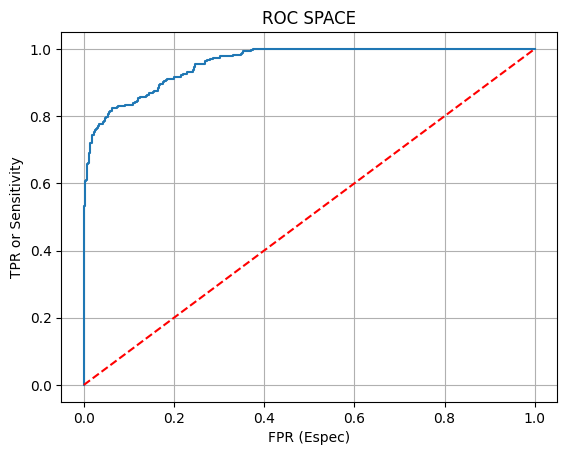

In [50]:
roc_curve = metrics.roc_curve(df[target], nb_proba)


roc_auc = metrics.roc_auc_score(df[target], nb_predict)
print(f"Nossa area, famosa integral, que está cobrindo: {(roc_auc * 100).__round__(3)}%")
plt.plot(roc_curve[0], roc_curve[1])
plt.plot([0,1], [0,1], '--', color="red")
plt.grid()
plt.title("ROC SPACE")
plt.xlabel("FPR (Espec)")
plt.ylabel("TPR or Sensitivity")
plt.show()

In [14]:
roc_auc = metrics.roc_auc_score(df[target], nb_predict)
print("A area que está cobrindo abaixo da linha:", roc_auc)
# quanto mais a area melhor

A area que está cobrindo abaixo da linha: 0.8700387413029729
